# DATA PREPARATION

In [13]:
import random
import pandas as pd
import numpy as np 
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## 1: How to add an index field using Python

In [4]:
data = pd.read_csv("StudentsPerformance.csv")

In [5]:
data['Index'] = range(1, len(data) + 1)
indexBf = data['Index']
data = data.drop(['Index'],axis=1)
data = pd.concat([indexBf,data],axis=1)
data.reset_index()
print(data.head(20))

    Index  gender race/ethnicity parental level of education         lunch  \
0       1  female        group B           bachelor's degree      standard   
1       2  female        group C                some college      standard   
2       3  female        group B             master's degree      standard   
3       4    male        group A          associate's degree  free/reduced   
4       5    male        group C                some college      standard   
5       6  female        group B          associate's degree      standard   
6       7  female        group B                some college      standard   
7       8    male        group B                some college  free/reduced   
8       9    male        group D                 high school  free/reduced   
9      10  female        group B                 high school  free/reduced   
10     11    male        group C          associate's degree      standard   
11     12    male        group D          associate's degree    

## 2:How to change misleading field values using Python

In [6]:
# To identify null values
data.isna().sum() 

Index                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total Marks in %               0
dtype: int64

In [7]:
# check the data types
data.dtypes

Index                            int64
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
Total Marks in %               float64
dtype: object

In [8]:
# To identify if the null values are categorical or numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Index                        1000 non-null   int64  
 1   gender                       1000 non-null   object 
 2   race/ethnicity               1000 non-null   object 
 3   parental level of education  1000 non-null   object 
 4   lunch                        1000 non-null   object 
 5   test preparation course      1000 non-null   object 
 6   math score                   1000 non-null   int64  
 7   reading score                1000 non-null   int64  
 8   writing score                1000 non-null   int64  
 9   Total Marks in %             1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


## 3:How to reexpress categorical field values using Python

In [9]:
# df_reexpress = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])
# df_reexpress.head()

## 4:How to standardise numeric fields using Python

In [10]:
data[['math score'  ,'reading score'  ,'writing score']] = MinMaxScaler().fit_transform(data[['math score'  ,'reading score'  ,'writing score']])
print(data.head(20))

    Index  gender race/ethnicity parental level of education         lunch  \
0       1  female        group B           bachelor's degree      standard   
1       2  female        group C                some college      standard   
2       3  female        group B             master's degree      standard   
3       4    male        group A          associate's degree  free/reduced   
4       5    male        group C                some college      standard   
5       6  female        group B          associate's degree      standard   
6       7  female        group B                some college      standard   
7       8    male        group B                some college  free/reduced   
8       9    male        group D                 high school  free/reduced   
9      10  female        group B                 high school  free/reduced   
10     11    male        group C          associate's degree      standard   
11     12    male        group D          associate's degree    

## 5:How to identify outliers using Python

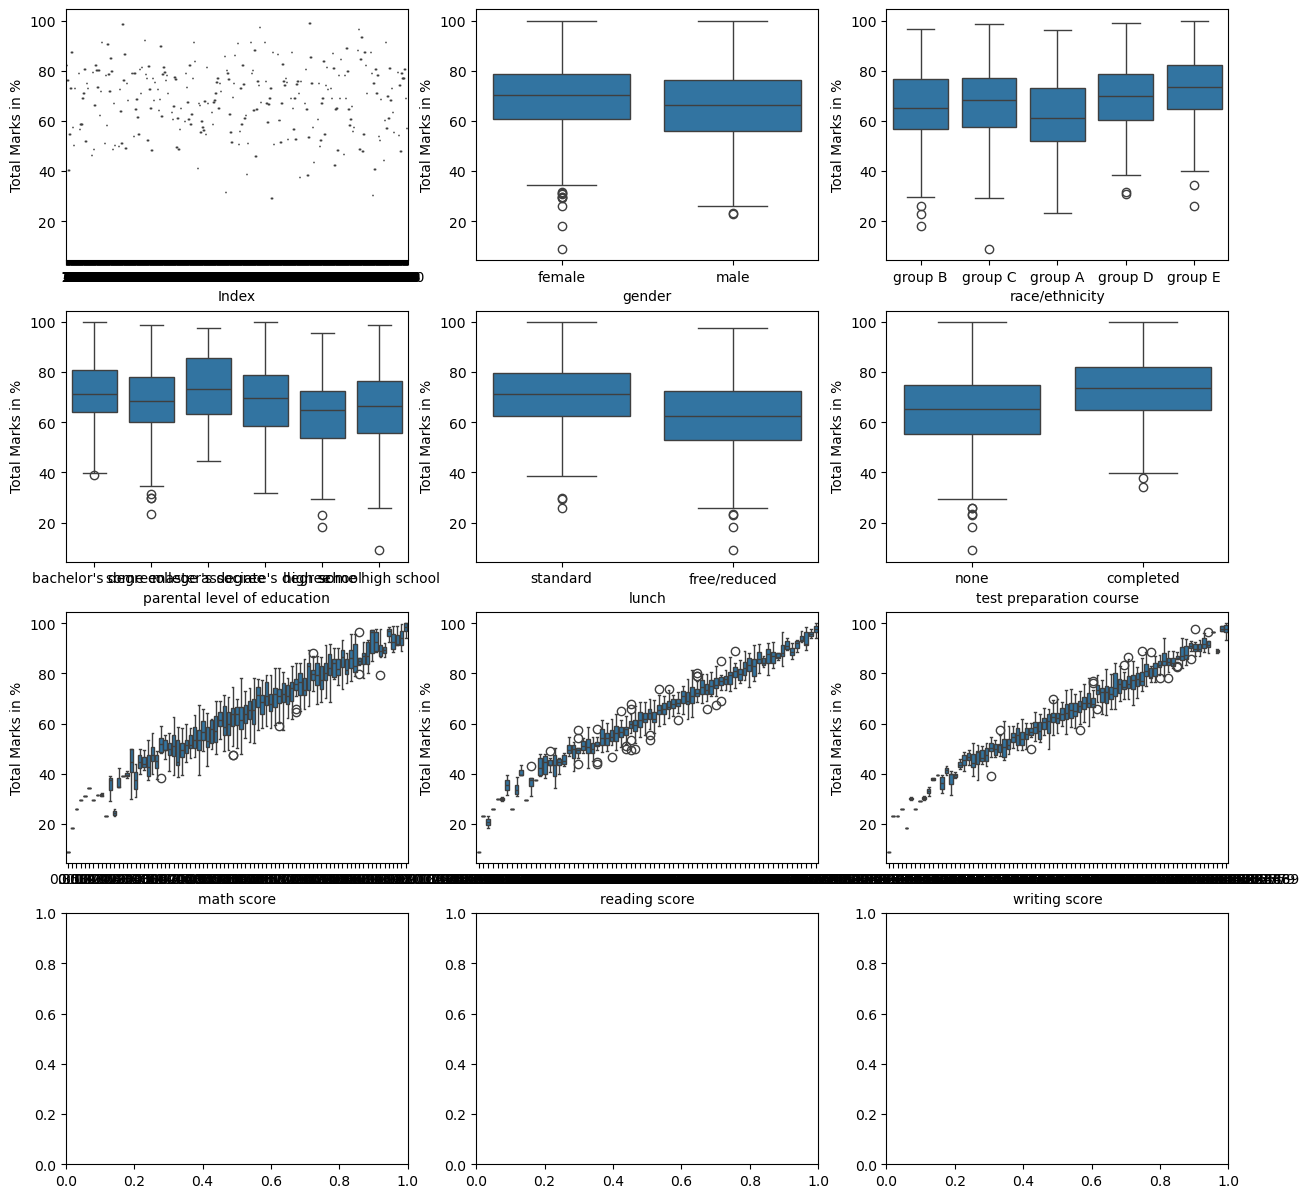

In [11]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
features = data.columns.drop('Total Marks in %')
feat_count = 0

for i in range(3):
    for j in range(3):
        sns.boxplot(ax=ax[i, j], data=data, x=features[feat_count], y='Total Marks in %')
        feat_count += 1

In [12]:
# Position of the Outlier
print(np.where(data['Total Marks in %']<30.0))

(array([ 17,  59,  76, 327, 338, 596, 601, 787, 980]),)
